In [452]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

In [453]:
# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# Predicting an Astrometric signal

## Variables set 

In [454]:
timescale = 4.2

planet_inc = 2

m_star  = 1                                                # M_sun
z_star  = 50*206265                                        # AU
v_star  = 4.74*(50*0.001)*(50)* (1/1.496e+8) * (3.154e+7)  # AU/year
vz_star = 0.1*v_star                                       # AU/year

## Simulations

In [455]:
sim_wp = rebound.Simulation()                                                               # create a simulation named sim_wp 

sim_wp.units=["msun","AU","year"]                                                           # setting units of sim_wpm

sim_wp.add(m=1)                                                                             # add the Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                                           # add Earth in a 1 AU circular orbit 

sim_wp.add(x = 1.031e7, vy=v_star, m = m_star, z = z_star, vz=vz_star)                      # add a star 50 pc away with calculated velocity and set parameters

sim_wp.add(m = 0.0143188, a = 0.6, e = 0.2, primary = sim_wp.particles[2], inc=planet_inc)  # add planet from figure 3.1 caption and have it orbit the star 

In [456]:
com_particle = sim_wp.calculate_com(first=2,last=4)

In [475]:
sim = rebound.Simulation()                          # create a simulation named sim 

sim.units=["msun","AU","year"]                      # setting units of sim 

sim.add(m=1)                                        # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                      # add Earth in a 1 AU circular orbit 

sim.add(com_particle)                               # add a particle equivaent to the star-planet barycentre

## Arrays to hold data 

In [939]:
m = 200
times = np.linspace(0,timescale,num=m)

In [940]:
# positions of sun, earth, star and planet
pos_sun   , pos_sun_wp    = np.zeros((m,3)) , np.zeros((m,3))
pos_earth , pos_earth_wp  = np.zeros((m,3)) , np.zeros((m,3))
pos_star  , pos_star_wp   = np.zeros((m,3)) , np.zeros((m,3))
pos_planet_wp             = np.zeros((m,3))

# center of mass 
sun_earth_com , sun_earth_com_wp = np.zeros((m,3)) , np.zeros((m,3))
all_com       , all_com_wp       = np.zeros((m,3)) , np.zeros((m,3))

# r_star - r_earth vector
r_SE, r_SE_wp  = np.zeros((m,3)), np.zeros((m,3))

# length of r_star - r_earth vector in x-y plane
r_SE_xy, r_SE_xy_wp = np.zeros((m,1)), np.zeros((m,1))

# right ascension and declination
alpha , alpha_wp  = np.empty((m,1)) , np.empty((m,1))
delta , delta_wp  = np.empty((m,1)) , np.empty((m,1))

## Filling arrays with data using a for loop

In [941]:
for i,t in enumerate(times):
    sim.integrate(t)
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i]   , pos_sun_wp[i]     = sim.particles[0].xyz,   sim_wp.particles[0].xyz
    pos_earth[i] , pos_earth_wp[i]   = sim.particles[1].xyz,   sim_wp.particles[1].xyz
    pos_star[i]  , pos_star_wp[i]    = sim.particles[2].xyz,   sim_wp.particles[2].xyz
    pos_planet_wp[i]                 =                         sim_wp.particles[3].xyz
    
    # center of mass of sun and earth 
    com, com_wp = sim.calculate_com(last=2), sim_wp.calculate_com(last=2)
    sun_earth_com[i], sun_earth_com_wp[i] = com.xyz, com_wp.xyz
    
    # center of mass of all objects 
    com_all, com_all_wp = sim.calculate_com(), sim_wp.calculate_com()
    all_com[i], all_com_wp[i] = com_all.xyz, com_all_wp.xyz
    
    # r_star - r_earth vector 
    r_SE[i], r_SE_wp[i] = pos_star[i] - pos_earth[i], pos_star_wp[i] - pos_earth_wp[i]
    
    #length of r_star - r_earth vector in x-y plane
    r_SE_xy[i], r_SE_xy_wp[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2), np.sqrt(r_SE_wp[i,0]**2 + r_SE_wp[i,1]**2)
    
    # calculating RA and Dec in mas
    alpha[i] , alpha_wp[i] = np.arctan((r_SE[i,1]/r_SE[i,0])) *206264806.24709466  , np.arctan((r_SE_wp[i,1]/r_SE_wp[i,0]))*206264806.24709466
    delta[i] , delta_wp[i] = np.arctan((r_SE[i,2]/r_SE_xy[i]))*206264806.24709466 , np.arctan((r_SE_wp[i,2]/r_SE_xy_wp[i]))*206264806.24709466

## Plots

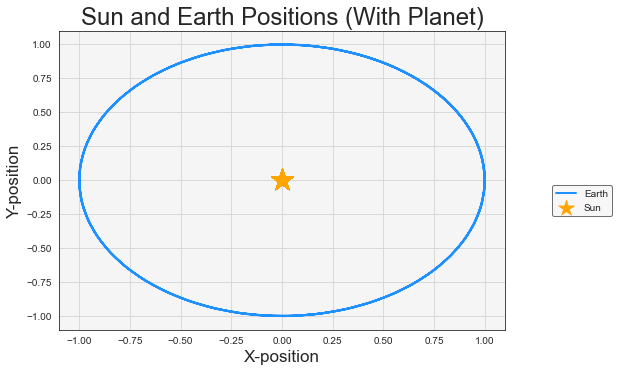

In [942]:
# plotting data
plt.scatter(pos_sun_wp[:,0], pos_sun_wp[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth_wp[:,0], pos_earth_wp[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# creating titles 
plt.title('Sun and Earth Positions (With Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.75, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

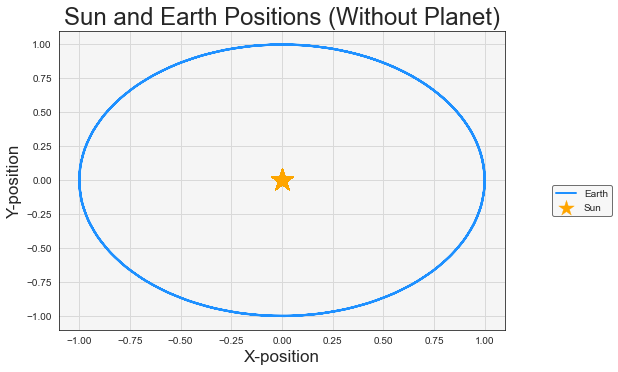

In [943]:
# plotting data 
plt.scatter(pos_sun[:,0], pos_sun[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth[:,0], pos_earth[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# setting titles
plt.title('Sun and Earth Positions (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.7, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

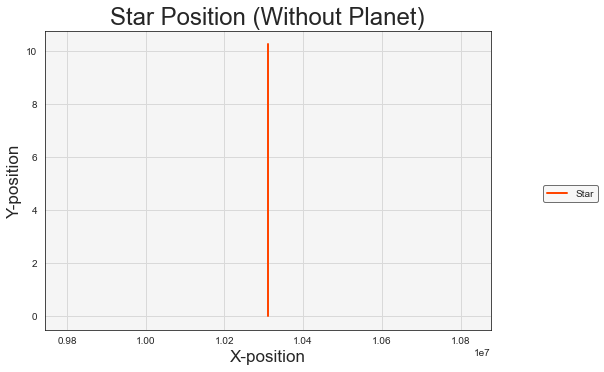

In [944]:
# plotting data 
plt.plot(pos_star[:,0], pos_star[:,1], color='orangered',linewidth=2, markersize=12, label='Star')

# setting titles
plt.title('Star Position (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

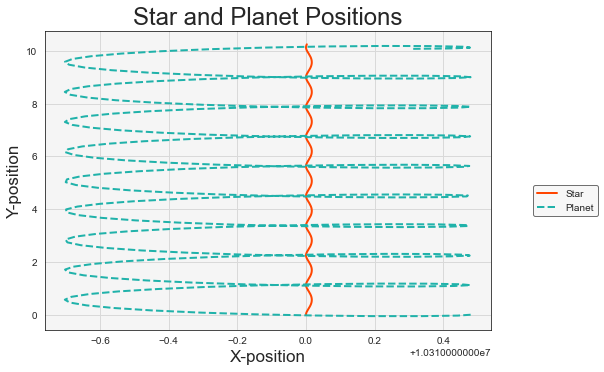

In [945]:
# plotting data 
plt.plot(pos_star_wp[:,0], pos_star_wp[:,1], color='orangered',linewidth=2, markersize=12, label='Star')
plt.plot(pos_planet_wp[:,0], pos_planet_wp[:,1], color='lightseagreen',linewidth=2, markersize=12, label='Planet', linestyle='dashed')

# creating titles 
plt.title('Star and Planet Positions',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

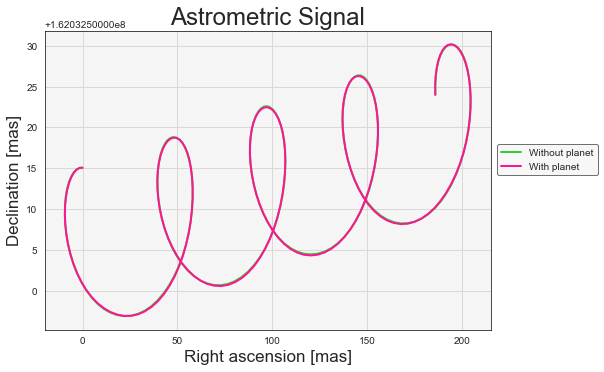

In [946]:
# plotting data 
plt.plot(alpha, delta, color='limegreen',linewidth=2, markersize=12, label='Without planet')
plt.plot(alpha_wp, delta_wp, color='deeppink',linewidth=2, markersize=12, label='With planet')

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

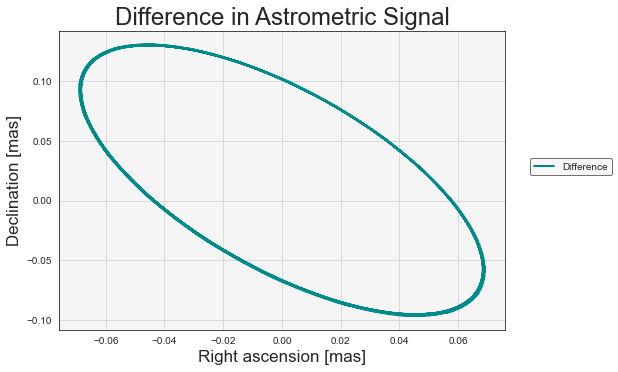

In [947]:
# plotting data 
plt.plot(alpha-alpha_wp, delta-delta_wp, color='darkcyan',linewidth=2, markersize=12, label='Difference')

# set titles 
plt.title('Difference in Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Reproducing astrometric signal using equations 3.22 and 3.23

## <span style='background :deeppink' > <span style='color:white'> Set conditions properly: $\omega,\Omega,i, \tau,\alpha,\beta,\Delta\alpha_0, \Delta\delta_0, \varpi, \mu_\alpha, \mu_\delta, t_0$</span></span>

In [948]:
a      = 0.6                                          # semi-major axis                                    [AU]
omega  = 0                                            # argument of perihelion                             [rad] 
OMEGA  = 0                                            # longitude of the ascending node                    [rad]
i      = planet_inc                                   # orbital inclination                                [rad]
e = 0.2                                               # ellipticity of the orbit                           [unitless]
tau = 0                                               # time of pericentre passage                         [years]


alpha1 = alpha_wp[0]*4.84814e-6                       #                                                    [rad]
delta1 = delta_wp[0]*4.84814e-6                       #                                                    [rad]

change_RA_0  = alpha_wp[1] - alpha_wp[0]              # change in RA at time t_0                           [as]
change_DEC_0 = delta_wp[1] - delta_wp[0]              # change in DEC at time t_0                          [as]

parallax = 1/50                                       # parallax of the system                             [as]


theta = (np.pi/2)-(delta1*4.84814e-6)

proper_motion = 0.05 

prop_RA = proper_motion*np.sin(theta)/np.cos(delta1)   # proper motion in RA direction                     [as/year]
prop_DEC = proper_motion*np.cos(theta)                 # proper motion in DEC direction                    [as/year]

t0 = 1.8                                                # 23 years since Julian date                        [years]

In [949]:
M = np.zeros((m,1))
E = np.zeros((m,1))
X = np.zeros((m,1))
Y = np.zeros((m,1))
PI = np.zeros((m,2))
sum_elements = np.zeros((m,2))
three22 = np.zeros((m,1))
three23 = np.zeros((m,1))

In [950]:
A = a * (  np.cos(omega) * np.cos(OMEGA) - np.sin(omega) * np.sin(OMEGA) * np.cos(i))
B = a * (  np.cos(omega) * np.sin(OMEGA) + np.sin(omega) * np.cos(OMEGA) * np.cos(i))
F = a * (- np.sin(omega) * np.cos(OMEGA) - np.cos(omega) * np.sin(OMEGA) * np.cos(i))
G = a * (- np.sin(omega) * np.sin(OMEGA) + np.cos(omega) * np.cos(OMEGA) * np.cos(i))

#### $r_x,r_y$ and $r_z$ are the cartesian components of the observer position w.r.t the solar system barycentre. The observer is the Earth.
#### <span style='background :red' > <span style='color:white'> might need to change these positions to wrt to barycenter?  </span> </span>

In [951]:
r = pos_earth_wp

#### Calculate:
- mean anomaly $M$ using the equation: $M=\frac{2\pi}{T}(t-\tau)=\frac{2\pi}{a^{3/2}}(t-\tau)$ (Exoplanet handbook 2.9) 
- Eccentric anomaly $E$ using rebound
- elliptical rectangular coordinates  using the equations $X=\cos(E(t))-e$ and $Y=\sqrt{(1-e^2)}\sin(E(t))$ (Exoplanet handbook equations 3.21)
- Orthogonal components of the displacements due to parallax using equation 3.24 from the Exoplanet handbook: $\Pi_{\alpha,t}=r_x(t)\sin\alpha-r_y(t)\cos\alpha$ and $\Pi_{\beta,t}=\left[r_x(t)\cos\alpha+r_y\sin\alpha\right]\sin\delta-r_z(t)\cos\delta$
- the sum part of equations 3.22 and 3.23 from the Exoplanet handbook: $BX_t+GY_t$ and $AX_t+FY_t$

In [952]:
k = 0
for k, t in enumerate(times):
    M[k] = (2*np.pi/a**(3/2))*(t - tau)
    E[k] = rebound.M_to_E(e,M[k]) 
    X[k] = np.cos(E[k]) - e
    Y[k] = np.sqrt(1-e**2) * np.sin(E[k])
    PI[k,0] =  r[k,0] * np.sin(alpha1) - r[k,1] * np.cos(alpha1)
    PI[k,1] = (r[k,0] * np.cos(alpha1) + r[k,1] * np.sin(alpha1)) * np.sin(delta1) - r[k,2] * np.cos(delta1)
    sum_elements[k,0] = B*X[k] + G*Y[k] 
    sum_elements[k,1] = A*X[k] + F*Y[k] 

In [953]:
sum_alpha = np.sum(sum_elements[:,0])
sum_delta = np.sum(sum_elements[:,1])

#### Final equations from sum + $\Delta\alpha_0\cos\delta+\varpi\Pi_{\alpha,t}+\mu_\alpha(t-t_0)$ and $\Delta\delta_0+\varpi\Pi_{\delta,t}+\mu_\delta(t-t_0)$

In [954]:
for d,t in enumerate(times):
    three22[d] = sum_alpha + change_RA_0  * np.cos(delta1)   + parallax * PI[d,0] + prop_RA * (t - t0)
    three23[d] = sum_delta + change_DEC_0 + parallax*PI[d,1] + prop_DEC * (t - t0)

#### <span style='background :red' > <span style='color:white'> Issues with the plot (assuming mas for now)  </span> </span>
- units?
- values are negative

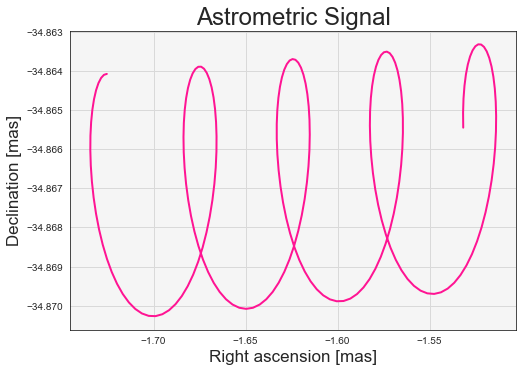

In [973]:
# plotting data 
plt.plot(three22,three23, color='deeppink',linewidth=2, markersize=12)

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# Comparing both

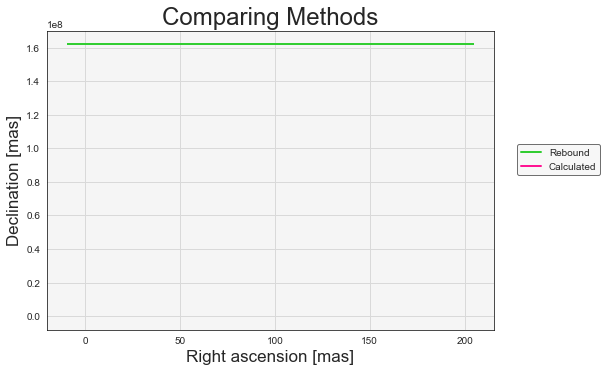

In [961]:
# plotting data 
plt.plot(alpha_wp, delta_wp, color='limegreen',linewidth=2, markersize=12, label='Rebound')
plt.plot(three22, three23, color='deeppink',linewidth=2, markersize=12, label='Calculated')

# set titles 
plt.title('Comparing Methods',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

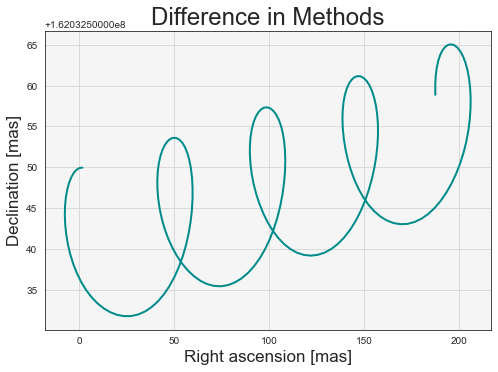

In [963]:
# plotting data 
plt.plot(alpha_wp-three22, delta_wp-three23, color='darkcyan',linewidth=2, markersize=12)

# set titles 
plt.title('Difference in Methods',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 